In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/trip.csv')

In [3]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
# Q. info() 메서드를 사용하여 데이터 컬럼명과 자료형을 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
# Q. describe() 메서드를 사용하여 데이터 컬럼별 통계량을 확인합니다.
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [6]:
# Q. 중복 데이터를 확인합니다.

data[data.duplicated()] 

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [7]:
# Q. 중복 데이터를 확인합니다.
# 위에서 확인한 중복 데이터의 승객명을 [[PASSENGER_NAME]] 대신 넣어주세요.

data[data['passenger_name'] == '[[PASSENGER_NAME]]']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [8]:
# Q. 중복 데이터를 제거합니다.
data = data.drop_duplicates()

In [9]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [10]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [14]:
# Q. 결측치를 제거합니다.
data=data.dropna()

In [15]:
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

In [17]:
# passenger_count 컬럼의 값을 기준으로 정렬합니다.

data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
416       6
4322      6
14500     6
0         6
64       36
Name: passenger_count, Length: 22696, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

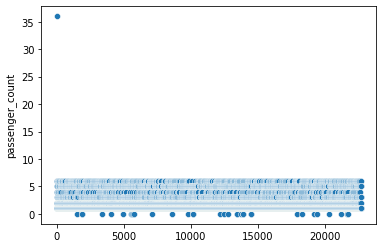

In [18]:
# passenger_count 값의 scatter plot을 그립니다.

sns.scatterplot(x = data.index, y = data['passenger_count'])

In [19]:
# passenger_count 컬럼의 이상치를 제거합니다.
# (passenger_count가 6을 초과하는 경우)

data = data[data['passenger_count'] < 6]

In [20]:
# passenger_count 컬럼의 이상치를 확인합니다.
# (passenger_count가 0인 경우)

len(data[data['passenger_count'] == 0])

33

In [21]:
# passenger_count 컬럼의 이상치를 제거합니다.

data = data[data['passenger_count'] >0]

<AxesSubplot:ylabel='passenger_count'>

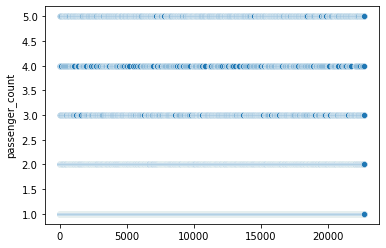

In [22]:
# passenger_count의 scatter plot을 다시 그려봅니다.

sns.scatterplot(x = data.index, y = data['passenger_count'])

In [23]:
# Q. trip_distance의 이상치를 확인합니다.

len(data[data['trip_distance'] == 0])

143

In [24]:
# Q. trip_distance의 이상치를 제거합니다.

data = data[data['trip_distance'] > 0]

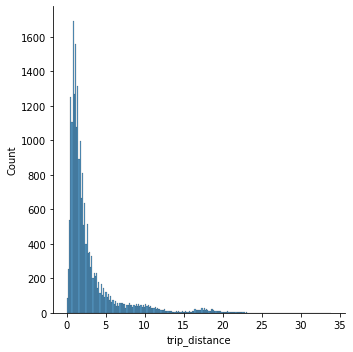

In [25]:
# Q. trip_distance의 히스토그램을 그립니다.

sns.displot(data['trip_distance'])

In [26]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,21827.000000,21827.000000,21827.000000,21827.000000,21827.000000
mean,1.508728,2.928924,12.957878,1.832780,0.308340
std,1.043520,3.650845,12.746823,2.777131,1.381892
min,1.000000,0.010000,-120.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.100000,14.500000,2.450000,0.000000
max,5.000000,33.960000,999.990000,200.000000,19.100000


In [27]:
# Q. fare_amount의 이상치 데이터 개수를 확인합니다.
# (fare_amount가 0 이하인 경우)

len(data[data['fare_amount'] <=0])

15

In [28]:
# Q. fare_amount의 이상치를 제거합니다.

data = data[data['fare_amount'] > 0]

In [29]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
9190,Valerie Vasquez,03/31/2017 5:29:19 AM,03/31/2017 5:29:32 AM,Cash,1,0.01,2.50,0.00,0.00
22525,Lisa Jacobs,04/26/2017 7:03:15 PM,04/26/2017 7:03:38 PM,Debit Card,2,0.08,2.50,1.29,0.00
16469,Sandra Rosario,05/02/2017 8:02:14 AM,05/02/2017 8:02:39 AM,Cash,1,0.11,2.50,0.50,0.00
11359,Kelsey Hill,12/25/2017 10:28:28 AM,12/25/2017 10:28:38 AM,Cash,2,0.06,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


In [30]:
# Q. fare_amount의 이상치를 제거합니다.

data = data[data['fare_amount'] < 200.01]

<AxesSubplot:ylabel='fare_amount'>

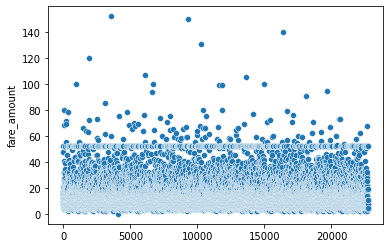

In [31]:
# Q. fare_amount의 scatter plot을 그립니다.

sns.scatterplot(x = data.index, y = data['fare_amount'])

In [32]:
# fare_amount가 150을 초과한다면 150으로 변환합니다.

def fare_func(x):
    if x > 150:
        return 150
    else:
        return x

In [33]:
data['fare_amount'].apply(fare_func)

1        16.0
2         6.5
3        20.5
4        16.5
6        47.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 21810, dtype: float64

In [34]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [35]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
16829,Jeffrey Jackson,05/02/2017 12:18:59 AM,05/02/2017 12:19:02 AM,Credit Card,1,0.02,2.50,0.00,0.00
22525,Lisa Jacobs,04/26/2017 7:03:15 PM,04/26/2017 7:03:38 PM,Debit Card,2,0.08,2.50,1.29,0.00
1077,Kyle Johnson,04/12/2017 8:51:58 PM,04/12/2017 8:52:07 PM,Cash,1,2.30,2.50,0.00,0.00
15348,Michael Ferguson,01/17/2017 1:18:24 PM,01/17/2017 1:18:31 PM,Debit Card,1,0.02,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
1930,Cameron Long,06/16/2017 6:30:08 PM,06/16/2017 7:18:50 PM,Debit Card,2,12.50,120.00,5.00,12.50
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00


<AxesSubplot:ylabel='tip_amount'>

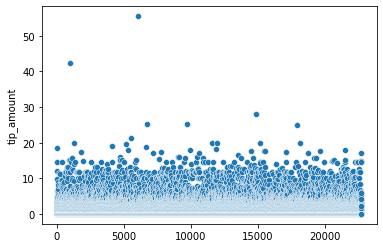

In [36]:
# Q. tip_amount의 scatter plot을 그립니다.

sns.scatterplot(x = data.index, y = data['tip_amount'])

In [37]:
# Q. tip_amount의 이상치를 제거합니다.

data = data[data['tip_amount'] < 40]

In [38]:
len(data)

21808

<AxesSubplot:ylabel='tolls_amount'>

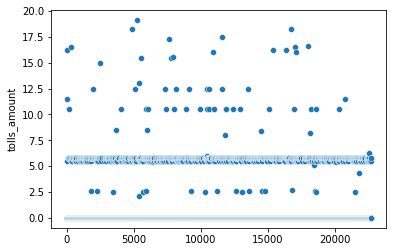

In [39]:
# Q. tolls_amount의 scatter plot을 그립니다.

sns.scatterplot(x = data.index, y = data['tolls_amount'])

In [40]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00
10,Cory Jensen,03/04/2017 11:58:00 AM,03/04/2017 12:13:12 PM,Cash,1,1.77,11.50,2.46,0.00
11,Jamie Brown,03/05/2017 7:15:30 PM,03/05/2017 7:52:18 PM,Debit Card,2,18.90,52.00,14.58,5.54


In [41]:
# payment_method 컬럼에 어떤 값들이 있는지 살펴봅시다.

data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [42]:
data['payment_method'].nunique()

3

In [43]:
data['payment_method'].value_counts()

Cash           10773
Debit Card      5549
Credit Card     5486
Name: payment_method, dtype: int64

In [44]:
# Q. 'Debit Card'와 'Credit Card' 항목을 'Card'로 변환합니다. 
# (힌트: replace() 메서드를 사용합니다.)

data['payment_method'] = data['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card'})

In [45]:
data['payment_method'].value_counts()

Card    11035
Cash    10773
Name: payment_method, dtype: int64

In [46]:
example = 'Susan Robinson'

In [47]:
example.split()

['Susan', 'Robinson']

In [70]:
# Q. passenger_name을 성과 이름으로 분리하여 성 부분만 passenger_first_name 컬럼으로 저장합니다.

# 성 부분만 추출하여 새로운 컬럼에 저장
data['passenger_first_name'] = data['passenger_name'].str.split(expand=True)[0]

In [51]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.5,9.86,0.0,Tonya


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21808 entries, 1 to 22700
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         21808 non-null  object         
 1   tpep_pickup_datetime   21808 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  21808 non-null  datetime64[ns] 
 3   payment_method         21808 non-null  object         
 4   passenger_count        21808 non-null  int64          
 5   trip_distance          21808 non-null  float64        
 6   fare_amount            21808 non-null  float64        
 7   tip_amount             21808 non-null  float64        
 8   tolls_amount           21808 non-null  float64        
 9   passenger_first_name   21808 non-null  object         
 10  travel_time            21808 non-null  timedelta64[ns]
 11  travel_time_seconds    21808 non-null  float64        
dtypes: datetime64[ns](2), float64(5), int64(1), ob

In [72]:
# Q. tpep_pickup_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

data['tpep_pickup_datetime']=pd.to_datetime(data['tpep_pickup_datetime'])

In [73]:
# Q. tpep_dropoff_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

data['tpep_dropoff_datetime']=pd.to_datetime(data['tpep_dropoff_datetime'])

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21808 entries, 1 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         21808 non-null  object        
 1   tpep_pickup_datetime   21808 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  21808 non-null  datetime64[ns]
 3   payment_method         21808 non-null  object        
 4   passenger_count        21808 non-null  int64         
 5   trip_distance          21808 non-null  float64       
 6   fare_amount            21808 non-null  float64       
 7   tip_amount             21808 non-null  float64       
 8   tolls_amount           21808 non-null  float64       
 9   passenger_first_name   21808 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 1.8+ MB


In [63]:
# Q. 하차 시각과 승차 시각의 차이를 travel_time 컬럼으로 저장합니다.
data['travel_time']=data['tpep_dropoff_datetime']-data['tpep_pickup_datetime']

In [64]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,travel_time_seconds
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30,-1590.0
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12,-432.0
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15,-1815.0
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43,-1003.0
6,Tonya Moreno,2017-05-03 19:04:09,2017-05-03 20:03:47,Cash,1,12.83,47.5,9.86,0.0,Tonya,0 days 00:59:38,-3578.0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21808 entries, 1 to 22700
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         21808 non-null  object         
 1   tpep_pickup_datetime   21808 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  21808 non-null  datetime64[ns] 
 3   payment_method         21808 non-null  object         
 4   passenger_count        21808 non-null  int64          
 5   trip_distance          21808 non-null  float64        
 6   fare_amount            21808 non-null  float64        
 7   tip_amount             21808 non-null  float64        
 8   tolls_amount           21808 non-null  float64        
 9   passenger_first_name   21808 non-null  object         
 10  travel_time            21808 non-null  timedelta64[ns]
 11  travel_time_seconds    21808 non-null  float64        
dtypes: datetime64[ns](2), float64(5), int64(1), ob

In [74]:
# Q. travel_time 컬럼의 데이터를 초 단위로 변환합니다.

data['travel_time_seconds'] = data['travel_time'].dt.seconds


In [75]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,travel_time_seconds
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43,1003
6,Tonya Moreno,2017-05-03 19:04:09,2017-05-03 20:03:47,Cash,1,12.83,47.5,9.86,0.0,Tonya,0 days 00:59:38,3578


In [76]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,travel_time_seconds
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43,1003
6,Tonya Moreno,2017-05-03 19:04:09,2017-05-03 20:03:47,Cash,1,12.83,47.5,9.86,0.0,Tonya,0 days 00:59:38,3578


In [77]:
# Q. 승객이 지불한 총 요금을 total_amount 컬럼으로 저장합니다.

data['total_amount']=data['fare_amount']+data['tip_amount']+data['tolls_amount']

<AxesSubplot:xlabel='fare_amount', ylabel='trip_distance'>

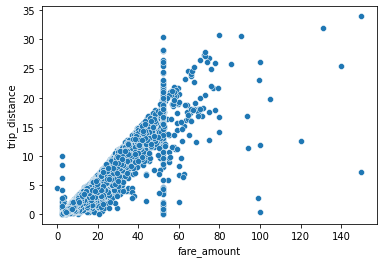

In [78]:
# Q. fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현합니다.

sns.scatterplot(x = data['fare_amount'], y = data['trip_distance']) 

<AxesSubplot:xlabel='fare_amount', ylabel='travel_time_seconds'>

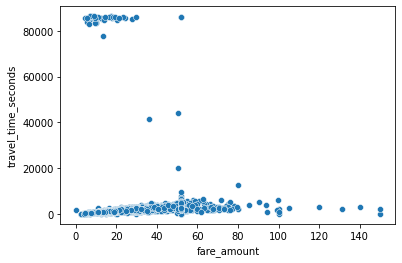

In [81]:
# Q. fare_amount와 travel_time 사이의 관계를 scatter plot으로 표현합니다.

sns.scatterplot(x=data['fare_amount'],y=data['travel_time_seconds'])

<AxesSubplot:xlabel='trip_distance', ylabel='travel_time_seconds'>

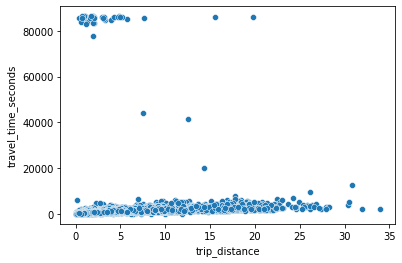

In [82]:
# Q. trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현합니다.

sns.scatterplot(x = data['trip_distance'], y = data['travel_time_seconds']) 

In [83]:
data = data[data['travel_time_seconds'] <60000]

In [84]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,travel_time_seconds,total_amount
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.00,Michelle,0 days 00:26:30,1590,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.00,Tina,0 days 00:07:12,432,7.95
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.00,Anthony,0 days 00:30:15,1815,26.89
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.00,Brianna,0 days 00:16:43,1003,16.50
6,Tonya Moreno,2017-05-03 19:04:09,2017-05-03 20:03:47,Cash,1,12.83,47.5,9.86,0.00,Tonya,0 days 00:59:38,3578,57.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,2017-02-24 17:37:23,2017-02-24 17:40:39,Cash,3,0.61,4.0,0.00,0.00,Austin,0 days 00:03:16,196,4.00
22697,Monique Williams,2017-08-06 16:43:59,2017-08-06 17:24:47,Cash,1,16.71,52.0,14.64,5.76,Monique,0 days 00:40:48,2448,72.40
22698,Drew Graves,2017-09-04 14:54:14,2017-09-04 14:58:22,Card,1,0.42,4.5,0.00,0.00,Drew,0 days 00:04:08,248,4.50
22699,Jonathan Copeland,2017-07-15 12:56:30,2017-07-15 13:08:26,Card,1,2.36,10.5,1.70,0.00,Jonathan,0 days 00:11:56,716,12.20
